In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
np.set_printoptions(precision=4, suppress=True)

In [13]:
np.random.normal(-.02, .1, 100).mean()

-0.02559889089453733

In [4]:
poss_rewards = np.arange(1, 91, 1)
scaled_rewards = []

In [5]:
for s in poss_rewards:
    if s <= 45:
        s = s / 45
    else:
        s = (s - 45) * (s/45)
    scaled_rewards.append(s) 


In [6]:
scaled_rewards

[0.022222222222222223,
 0.044444444444444446,
 0.06666666666666667,
 0.08888888888888889,
 0.1111111111111111,
 0.13333333333333333,
 0.15555555555555556,
 0.17777777777777778,
 0.2,
 0.2222222222222222,
 0.24444444444444444,
 0.26666666666666666,
 0.28888888888888886,
 0.3111111111111111,
 0.3333333333333333,
 0.35555555555555557,
 0.37777777777777777,
 0.4,
 0.4222222222222222,
 0.4444444444444444,
 0.4666666666666667,
 0.4888888888888889,
 0.5111111111111111,
 0.5333333333333333,
 0.5555555555555556,
 0.5777777777777777,
 0.6,
 0.6222222222222222,
 0.6444444444444445,
 0.6666666666666666,
 0.6888888888888889,
 0.7111111111111111,
 0.7333333333333333,
 0.7555555555555555,
 0.7777777777777778,
 0.8,
 0.8222222222222222,
 0.8444444444444444,
 0.8666666666666667,
 0.8888888888888888,
 0.9111111111111111,
 0.9333333333333333,
 0.9555555555555556,
 0.9777777777777777,
 1.0,
 1.0222222222222221,
 2.088888888888889,
 3.2,
 4.355555555555555,
 5.555555555555555,
 6.8,
 8.088888888888889,
 9.

In [7]:
scaled_rewards[-1]

90.0

In [11]:

scaled_rewards_plot= pd.DataFrame(scaled_rewards).cumsum()

In [18]:
scaled_rewards_plot.head(50)

,0
0,0.022222
1,0.066667
2,0.133333
3,0.222222
4,0.333333
5,0.466667
6,0.622222
7,0.800000
8,1.000000
9,1.222222


<Axes: ylabel='0'>

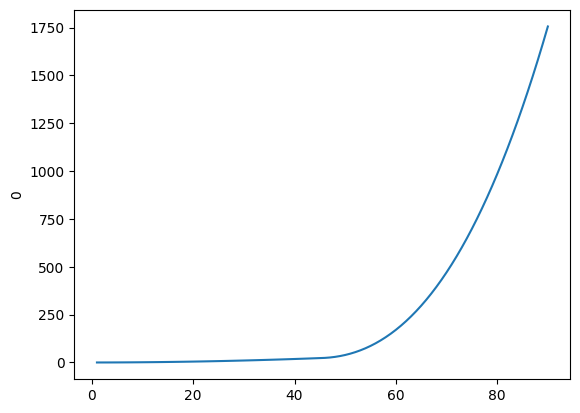

In [12]:
sns.lineplot(x=np.arange(1, 91, 1), y=scaled_rewards_plot[0])